### 1.Let's get Started

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
from tqdm import tqdm
from datetime import datetime
import json
from sklearn.preprocessing import LabelEncoder
from scipy import stats
warnings.filterwarnings("ignore")

In [18]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [19]:
test.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,...,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",7/14/07,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de..."
1,3002,NaN,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/19/58,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A titanic beauty spreads a macabre wave of hor...,Attack of the 50 Foot Woman,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...","[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de..."
2,3003,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0118556,en,Addicted to Love,Good-natured astronomer Sam is devastated when...,8.085194,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/23/97,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Comedy About Lost Loves And Last Laughs,Addicted to Love,"[{'id': 931, 'name': 'jealousy'}, {'id': 9673,...","[{'cast_id': 11, 'character': 'Maggie', 'credi...","[{'credit_id': '52fe4330c3a36847f8041367', 'de..."
3,3004,NaN,6800000,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",http://www.sonyclassics.com/incendies/,tt1255953,fr,Incendies,A mother's last wishes send twins Jeanne and S...,8.596012,...,"[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",9/4/10,130.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,The search began at the opening of their mothe...,Incendies,"[{'id': 378, 'name': 'prison'}, {'id': 539, 'n...","[{'cast_id': 6, 'character': 'Nawal', 'credit_...","[{'credit_id': '56478092c3a36826140043af', 'de..."
4,3005,NaN,2000000,"[{'id': 36, 'name': 'History'}, {'id': 99, 'na...",NaN,tt0418753,en,Inside Deep Throat,"In 1972, a seemingly typical shoestring budget...",3.217680,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2/11/05,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was filmed in 6 days for 25 thousand dollar...,Inside Deep Throat,"[{'id': 279, 'name': 'usa'}, {'id': 1228, 'nam...","[{'cast_id': 1, 'character': 'Narrator (voice)...","[{'credit_id': '52fe44ce9251416c75041967', 'de..."


- Data Description id - 各映画に固有の整数型のID。

- belongs_to_collection - 映画が属するコレクションのTMDB ID、名前、ポスターURL、背景画像URLを含むJSON形式のデータです。ポスターや背景画像は以下のように表示できます：
例）https://image.tmdb.org/t/p/original//iEhb00TGPucF0b4joM1ieyY026U.jpg

- budget:映画の予算（単位：ドル）。値が0の場合は不明を意味します。

- genres : ジャンル名とTMDBのジャンルIDを含むJSON形式のデータ。

- homepage - 映画の公式ホームページのURL。
例）http://sonyclassics.com/whiplash/ （映画『セッション』の公式サイト）

- imdb_id -  映画のIMDB（インターネット・ムービー・データベース）ID（文字列）。
IMDBのページは以下のようにアクセスできます： https://www.imdb.com/title/

- original_language - 映画のオリジナル言語を示す2文字のコード。
例）en = 英語、fr = フランス語

- original_title - 映画の原題。英語タイトルと異なる場合があります（特に、オリジナル言語が英語でない場合）。

- overview - 映画の簡単な説明（あらすじ）。

- popularity - 映画の人気度（小数値で表現されます）。

- poster_path - 映画のポスターパス。完全な画像は以下のURLにパスを付けて表示可能です：
例）https://image.tmdb.org/t/p/original/

- production_companies - 映画を制作した会社の名前とTMDB IDをJSON形式で記載。

- production_countries - 映画の製作国を、2文字の国コードと国名でJSON形式にて記載。

- release_date - 映画の公開日（形式：mm/dd/yy）。

- runtime - 映画の上映時間（分単位の整数値）。

- spoken_languages - 話されている言語の2文字コードとその正式名称。

- status - 映画が「公開済み」か「噂段階」かを示すステータス。

- tagline - 映画のキャッチコピー（タグライン）。

- title - 映画の英語タイトル。

- Keywords - 映画に関連するキーワードのTMDB IDと名称をJSON形式で記載。

- cast - 出演者のTMDB ID、名前、役名、性別（1 = 女性、2 = 男性）を含むJSON形式のデータ。

- crew - スタッフ（監督、脚本家、美術、音響など）の名前、TMDB ID、プロフィール画像パスなどを含むJSON形式のデータ。

- revenue - 映画が得た総収益（ドル単位）。



In [20]:
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    summary['Third Value'] = df.loc[2].values

    for name in summary['Name'].value_counts().index:
        summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(df[name].value_counts(normalize=True), base=2),2) 

    return summary

In [21]:
resumetable(train)

Dataset Shape: (3000, 23)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,id,int64,0,3000,1,2,3,11.55
1,belongs_to_collection,object,2396,422,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...","[{'id': 107674, 'name': 'The Princess Diaries ...",NaN,8.49
2,budget,int64,0,406,14000000,40000000,3300000,6.03
3,genres,object,7,872,"[{'id': 35, 'name': 'Comedy'}]","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[{'id': 18, 'name': 'Drama'}]",7.93
4,homepage,object,2054,941,NaN,NaN,http://sonyclassics.com/whiplash/,9.87
5,imdb_id,object,0,3000,tt2637294,tt0368933,tt2582802,11.55
6,original_language,object,0,36,en,en,en,1.15
7,original_title,object,0,2975,Hot Tub Time Machine 2,The Princess Diaries 2: Royal Engagement,Whiplash,11.53
8,overview,object,8,2992,"When Lou, who has become the ""father of the In...",Mia Thermopolis is now a college graduate and ...,"Under the direction of a ruthless instructor, ...",11.55
9,popularity,float64,0,2999,6.575393,8.248895,64.29999,11.55


In [22]:
train.describe(include='all')

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
count,3000.000000,604,3.000000e+03,2993,946,3000,3000,3000,2992,3000.000000,...,3000,2998.000000,2980,3000,2403,3000,2724,2987,2984,3.000000e+03
unique,NaN,422,NaN,872,941,3000,36,2975,2992,NaN,...,2398,NaN,401,2,2400,2969,2648,2975,2984,NaN
top,NaN,"[{'id': 645, 'name': 'James Bond Collection', ...",NaN,"[{'id': 18, 'name': 'Drama'}]",http://www.transformersmovie.com/,tt1600195,en,Lolita,Anna (Marceau) is a wife and mother who has an...,NaN,...,9/10/10,NaN,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Based on a true story.,Deadfall,"[{'id': 10183, 'name': 'independent film'}]",[],"[{'credit_id': '5391990d0e0a260fb5001629', 'de...",NaN
freq,NaN,16,NaN,266,4,1,2575,2,1,NaN,...,5,NaN,1817,2996,3,2,27,13,1,NaN
mean,1500.500000,NaN,2.253133e+07,NaN,NaN,NaN,NaN,NaN,NaN,8.463274,...,NaN,107.856571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.672585e+07
std,866.169729,NaN,3.702609e+07,NaN,NaN,NaN,NaN,NaN,NaN,12.104000,...,NaN,22.086434,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.375323e+08
min,1.000000,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,0.000001,...,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00
25%,750.750000,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,4.018053,...,NaN,94.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.379808e+06
50%,1500.500000,NaN,8.000000e+06,NaN,NaN,NaN,NaN,NaN,NaN,7.374861,...,NaN,104.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.680707e+07
75%,2250.250000,NaN,2.900000e+07,NaN,NaN,NaN,NaN,NaN,NaN,10.890983,...,NaN,118.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.891920e+07


In [23]:
test.describe(include='all')

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
count,4398.000000,877,4.398000e+03,4382,1420,4398,4398,4398,4384,4398.000000,...,4296,4397,4394.000000,4356,4396,3535,4395,4005,4385,4376
unique,NaN,556,NaN,1101,1402,4398,39,4353,4383,NaN,...,458,3289,NaN,526,3,3529,4342,3885,4365,4376
top,NaN,"[{'id': 645, 'name': 'James Bond Collection', ...",NaN,"[{'id': 18, 'name': 'Drama'}]",http://www.workandtheglory.com/,tt0056663,en,Halloween II,No overview found.,NaN,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",9/9/11,NaN,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Love is a force of nature.,A Nightmare on Elm Street,"[{'id': 187056, 'name': 'woman director'}]",[],"[{'credit_id': '52fe4306c3a36847f80349a5', 'de..."
freq,NaN,10,NaN,348,3,1,3776,2,2,NaN,...,2587,7,NaN,2704,4389,2,2,30,21,1
mean,5199.500000,NaN,2.264929e+07,NaN,NaN,NaN,NaN,NaN,NaN,8.550230,...,NaN,NaN,107.622212,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1269.737571,NaN,3.689991e+07,NaN,NaN,NaN,NaN,NaN,NaN,12.209014,...,NaN,NaN,21.058290,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,3001.000000,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,0.000001,...,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,4100.250000,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,3.895186,...,NaN,NaN,94.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,5199.500000,NaN,7.450000e+06,NaN,NaN,NaN,NaN,NaN,NaN,7.482242,...,NaN,NaN,104.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,6298.750000,NaN,2.800000e+07,NaN,NaN,NaN,NaN,NaN,NaN,10.938524,...,NaN,NaN,118.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 2.EDA

In [26]:
missing_counts = train.isna().sum()

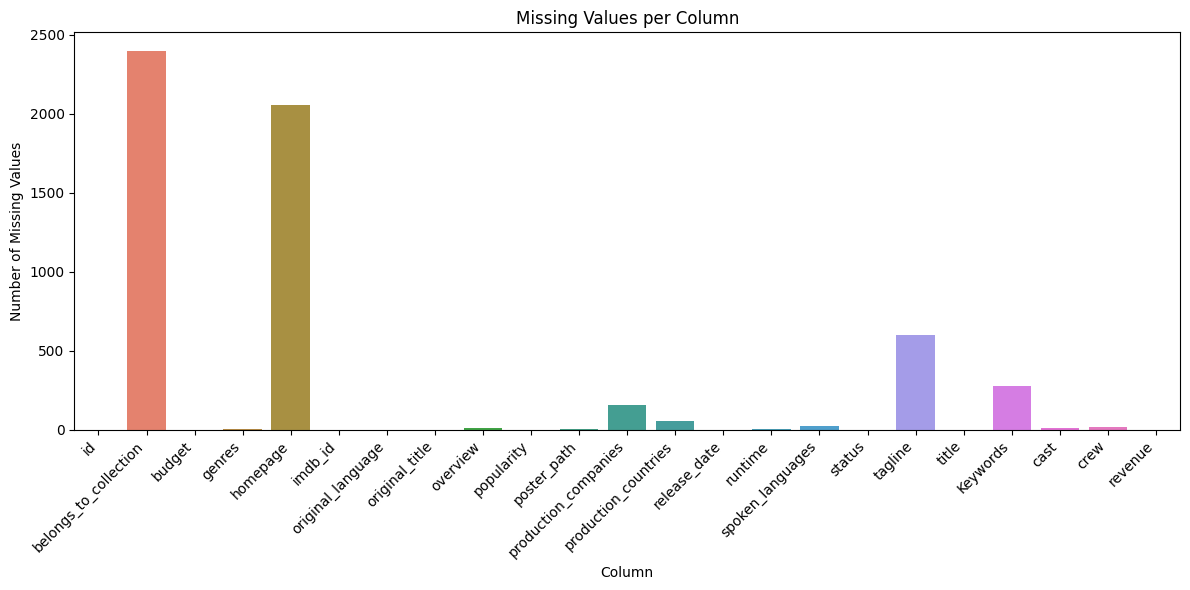

In [31]:
missing_df = missing_counts.reset_index()
missing_df.columns = ['column', 'missing_count']
# プロット
plt.figure(figsize=(12, 6))
palette = sns.color_palette("husl", len(missing_df))  # 異なる色を指定
sns.barplot(data=missing_df, x='column', y='missing_count', palette=palette)

plt.title("Missing Values per Column")
plt.xlabel("Column")
plt.ylabel("Number of Missing Values")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [32]:
missing_counts = test.isna().sum()

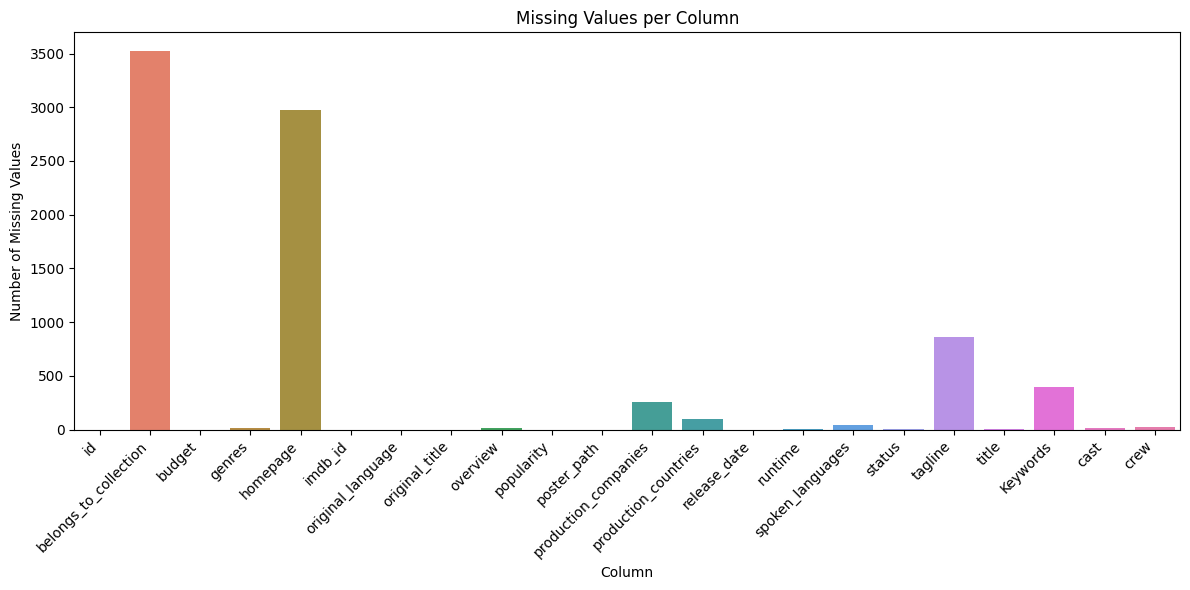

In [33]:
missing_df = missing_counts.reset_index()
missing_df.columns = ['column', 'missing_count']
# プロット
plt.figure(figsize=(12, 6))
palette = sns.color_palette("husl", len(missing_df))  # 異なる色を指定
sns.barplot(data=missing_df, x='column', y='missing_count', palette=palette)

plt.title("Missing Values per Column")
plt.xlabel("Column")
plt.ylabel("Number of Missing Values")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Plot Budget vs Revenue

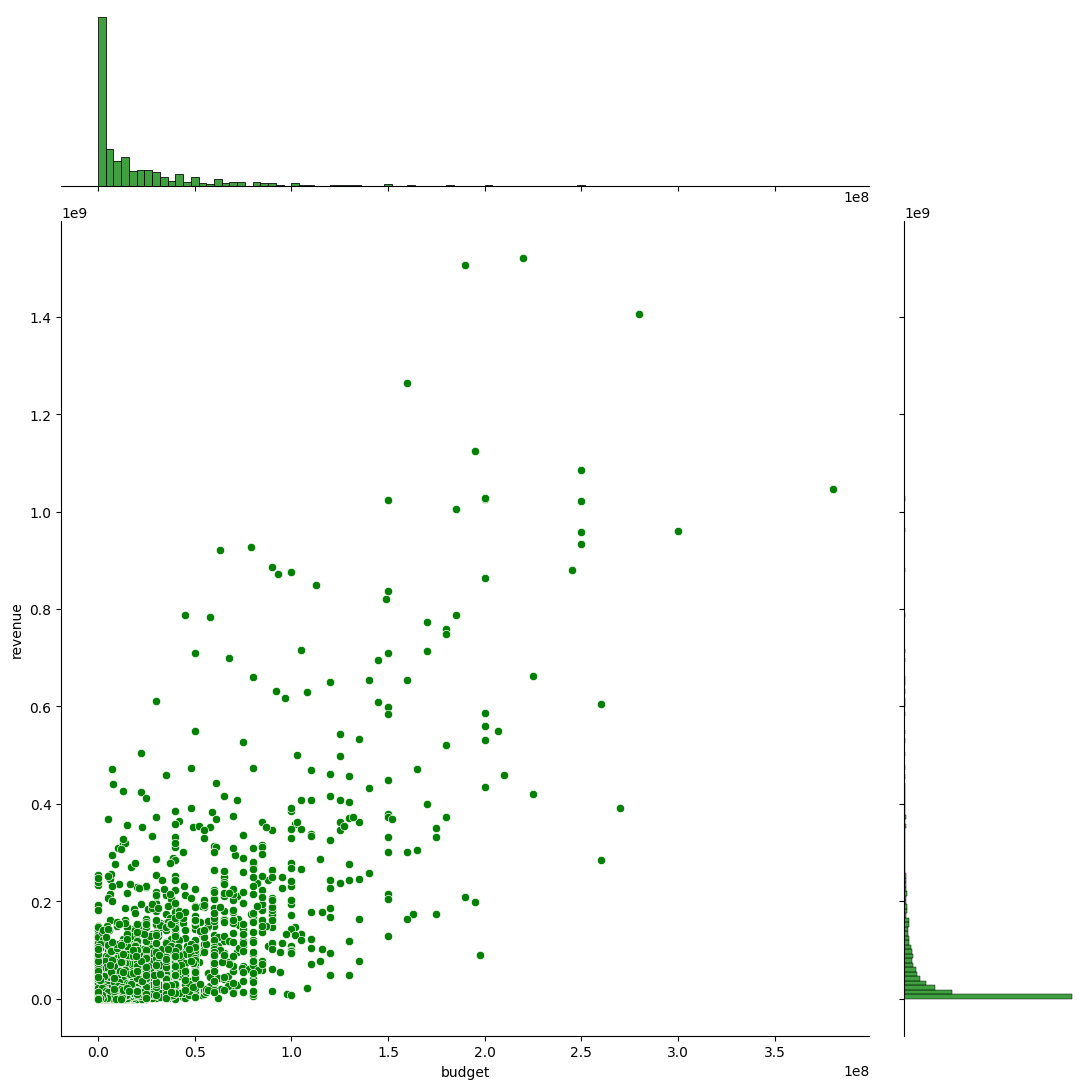

In [34]:
sns.jointplot(x="budget", y="revenue", data=train, height=11, ratio=4, color="g")
plt.show()

#### Plot popularity vs revenue

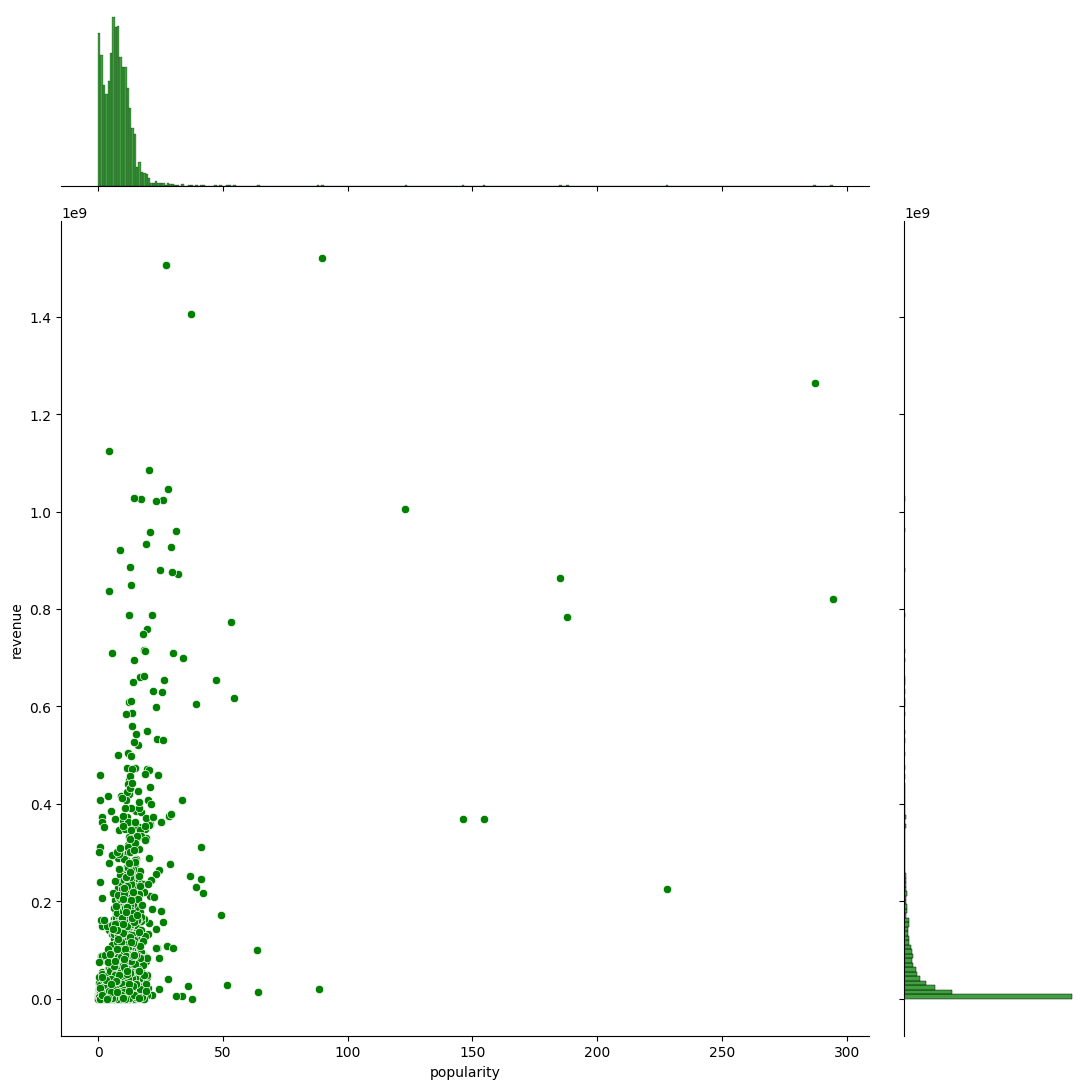

In [35]:
sns.jointplot(x="popularity", y="revenue", data=train, height=11, ratio=4, color="g")
plt.show()

#### Plot runtime vs revenue

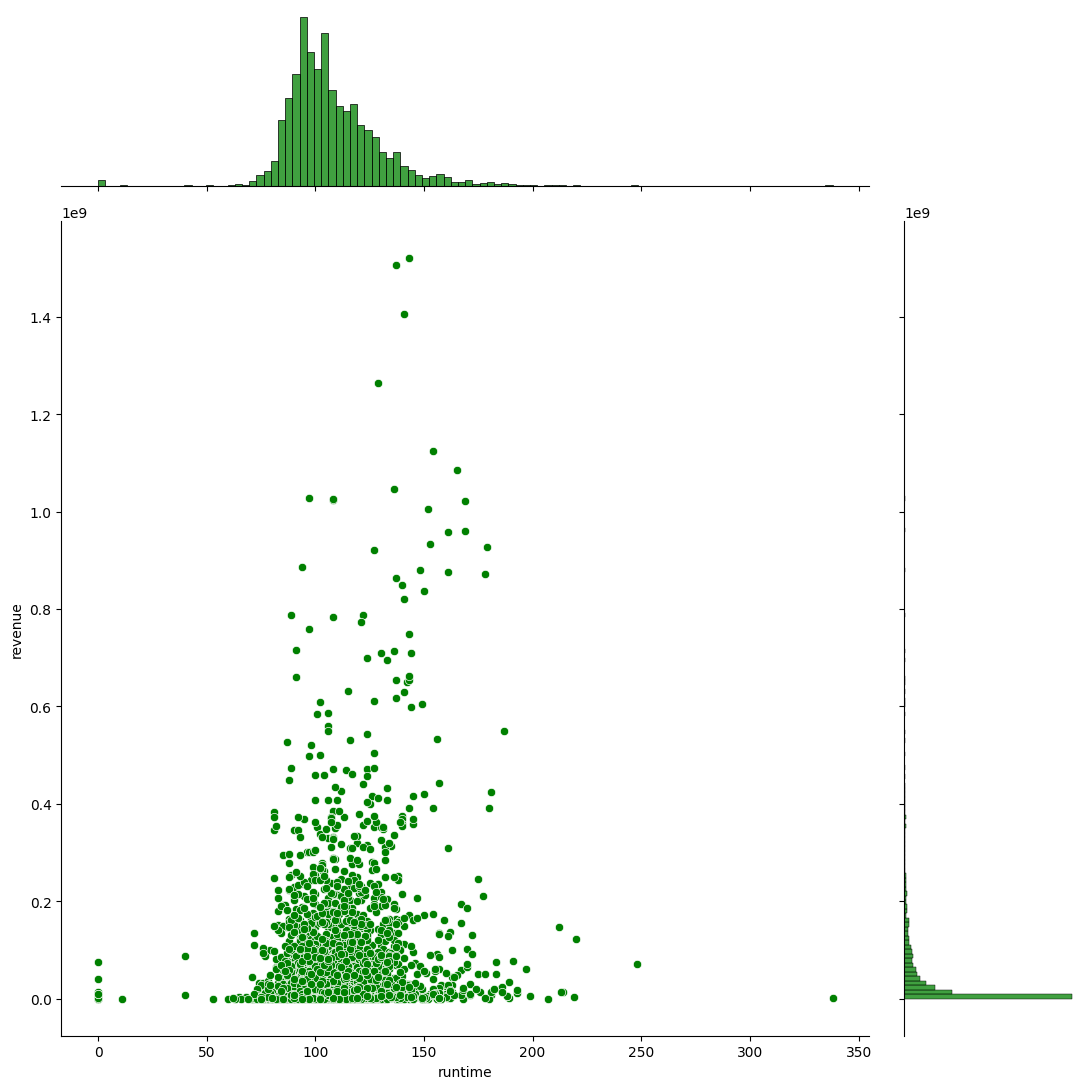

In [36]:
sns.jointplot(x="runtime", y="revenue", data=train, height=11, ratio=4, color="g")
plt.show()

#### Revenue Distribution

<Axes: xlabel='revenue', ylabel='Density'>

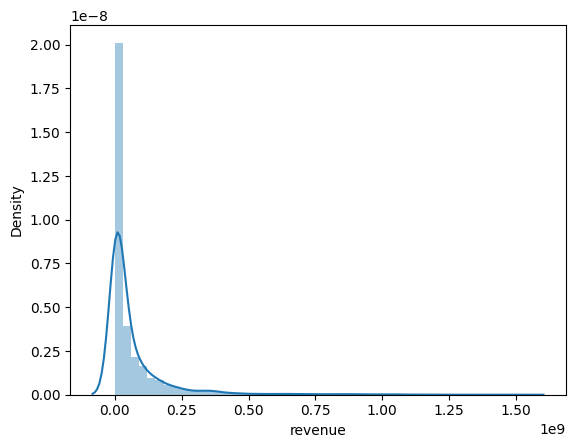

In [38]:
sns.distplot(train.revenue)

In [39]:
train.revenue.describe()

count    3.000000e+03
mean     6.672585e+07
std      1.375323e+08
min      1.000000e+00
25%      2.379808e+06
50%      1.680707e+07
75%      6.891920e+07
max      1.519558e+09
Name: revenue, dtype: float64

「revenue（収益）」の変数は偏っているため、その対数を計算しましょう。

<Axes: xlabel='logRevenue', ylabel='Density'>

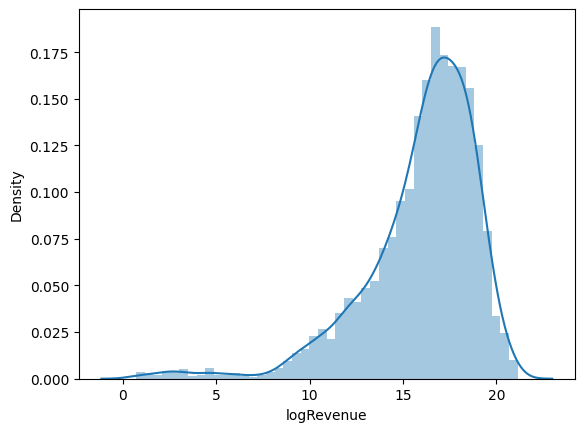

In [40]:
train['logRevenue'] = np.log1p(train['revenue'])
sns.distplot(train['logRevenue'] )

Get Month, Day Year, Week day, quarter from release date

In [ ]:
#Since only last two digits of year are provided, this is the correct way of getting the year.
train[['release_month','release_day','release_year']]=train['release_date'].str.split('/',expand=True).replace(np.nan, -1).astype(int)
# Some rows have 4 digits of year instead of 2, that's why I am applying (train['release_year'] < 100) this condition
train.loc[ (train['release_year'] <= 19) & (train['release_year'] < 100), "release_year"] += 2000
train.loc[ (train['release_year'] > 19)  & (train['release_year'] < 100), "release_year"] += 1900

releaseDate = pd.to_datetime(train['release_date']) 
train['release_dayofweek'] = releaseDate.dt.dayofweek
train['release_quarter'] = releaseDate.dt.quarter

In [37]:
train = train[['budget','rating','totalVotes','popularity','runtime','release_year','release_month','release_dayofweek','revenue']]
f,ax = plt.subplots(figsize=(10, 8))
sns.heatmap(train.corr(), annot=True)
plt.show()


KeyError: "['rating', 'totalVotes', 'release_year', 'release_month', 'release_dayofweek'] not in index"

### 3.Feature Engineering & Prediction

私は2つの外部データセットを使用しています。

1.TMDBコンペティション追加特徴量：このデータセットには、映画の評価（rating）と投票数（number of votes）が含まれています。

2.TMDBコンペティション追加学習データ：このデータセットには約2,000行の追加データが含まれており、私はこれを学習用データとして使用しています。

また、いくつかの行については、予算（budget）や収益（revenue）を手動で修正しています。何か不明な点があれば教えてください。